In [1]:
## Preliminary

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from collections import Counter
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import seaborn as sns
from statsmodels.graphics.gofplots import qqplot
import plotly.express as px
from sklearn.model_selection import train_test_split, GridSearchCV

!pip install mitosheet 
import mitosheet 

!pip install xgboost
import xgboost

%config InlineBackend.figure_format = "svg"

In [3]:
df = pd.read_csv('../datasets/train.csv')

In [4]:
# Remove irrelevant columns

In [5]:
# Deleted columns property_id
df.drop(['property_id'], axis=1, inplace=True)

# Deleted columns property_name
df.drop(['property_name'], axis=1, inplace=True)

# Deleted columns property_summary
df.drop(['property_summary'], axis=1, inplace=True)

# Deleted columns property_space
df.drop(['property_space'], axis=1, inplace=True)

# Deleted columns property_desc
df.drop(['property_desc'], axis=1, inplace=True)

# Deleted columns property_neighborhood
df.drop(['property_neighborhood'], axis=1, inplace=True)

# Deleted columns property_notes
df.drop(['property_notes'], axis=1, inplace=True)

# Deleted columns property_transit
df.drop(['property_transit'], axis=1, inplace=True)

# Deleted columns property_access
df.drop(['property_access'], axis=1, inplace=True)

# Deleted columns property_interaction
df.drop(['property_interaction'], axis=1, inplace=True)

# Deleted columns property_rules
df.drop(['property_rules'], axis=1, inplace=True)

# Deleted columns property_sqfeet
df.drop(['property_sqfeet'], axis=1, inplace=True)

# Deleted columns property_scraped_at
df.drop(['property_scraped_at'], axis=1, inplace=True)

# Deleted columns property_last_updated
df.drop(['property_last_updated'], axis=1, inplace=True)

# Deleted columns host_id
df.drop(['host_id'], axis=1, inplace=True)

# Deleted columns host_location
df.drop(['host_location'], axis=1, inplace=True)

# Deleted columns host_about
df.drop(['host_about'], axis=1, inplace=True)

# Deleted columns host_nr_listings_total
df.drop(['host_nr_listings_total'], axis=1, inplace=True)

# Deleted columns host_verified
df.drop(['host_verified'], axis=1, inplace=True)

# Deleted columns booking_max_nights
df.drop(['booking_max_nights'], axis=1, inplace=True)

# Deleted columns reviews_first
df.drop(['reviews_first'], axis=1, inplace=True)

# Deleted columns reviews_last
df.drop(['reviews_last'], axis=1, inplace=True)

In [6]:
# Transform target to logarithm (target)
df['target'] = np.log(df['target'])

In [7]:
# Remove target outliers
Q1_target = df['target'].quantile(0.25)
Q3_target = df['target'].quantile(0.75)
IQR_target = Q3_target - Q1_target

lower_bound_target = Q1_target - 1.5 * IQR_target
upper_bound_target = Q3_target + 1.5 * IQR_target

df = df[(df['target'] >= lower_bound_target) & (df['target'] <= upper_bound_target)]

In [8]:
# Check for missing values
df['booking_cancel_policy'].isna().sum()

0

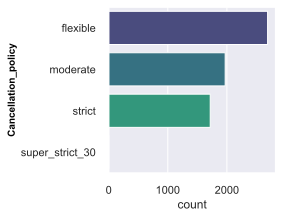

In [9]:
sns.set(style='darkgrid')
plt.figure(figsize=(3,3))
sns.countplot(y = df['booking_cancel_policy'],order = df['booking_cancel_policy'].value_counts().index,palette = "viridis")
plt.ylabel('Cancellation_policy',fontsize = 10, weight = 'bold',color='black')
#plt.axes().set(facecolor = "White")
plt.show()

In [10]:
# Remove super_strict_30
df = df[df['booking_cancel_policy'] != 'super_strict_30']

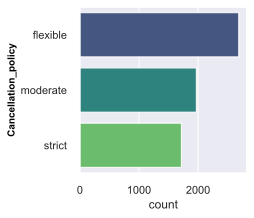

In [11]:
sns.set(style='darkgrid')
plt.figure(figsize=(3,3))
sns.countplot(y = df['booking_cancel_policy'],order = df['booking_cancel_policy'].value_counts().index,palette = "viridis")
plt.ylabel('Cancellation_policy',fontsize = 10, weight = 'bold',color='black')
#plt.axes().set(facecolor = "White")
plt.show()

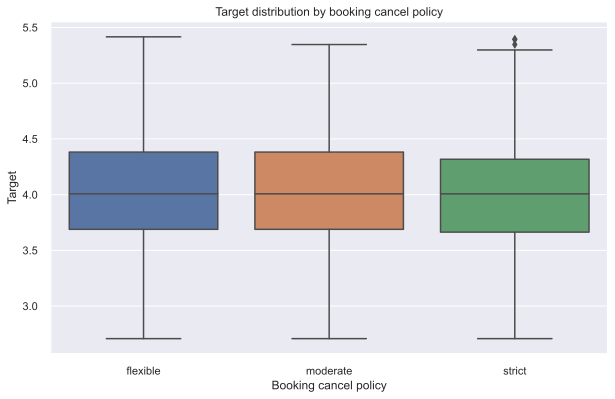

In [12]:
# Generate the boxplot
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x='booking_cancel_policy', y='target', data=df)
ax.set_title('Target distribution by booking cancel policy')
ax.set_xlabel('Booking cancel policy')
ax.set_ylabel('Target')
plt.show()

In [13]:
# Generate the statistical description
df.groupby('booking_cancel_policy')['target'].describe()

,count,mean,std,min,25%,50%,75%,max
booking_cancel_policy,,,,,,,,
flexible,2689.0,4.029010,0.518543,2.70805,3.688879,4.007333,4.382027,5.416100
moderate,1971.0,4.034317,0.513065,2.70805,3.688879,4.007333,4.382027,5.347108
strict,1718.0,3.992185,0.507957,2.70805,3.663562,4.007333,4.317488,5.393628


In [14]:
# Check if there are significant differences in price between the types
from scipy.stats import f_oneway

policy_groups = [group['target'] for name, group in df.groupby('booking_cancel_policy')]
f_stat, p_value = f_oneway(*policy_groups)

if p_value < 0.05:
    print("There are significant differences in target values between types")
else:
    print("There are no significant differences in target values between types")

There are significant differences in target values between types


In [15]:
# Because of the reasons highlighted in this EDA, we have decided to NOT remove booking_cancel_policy
# as an attribute from our training set.